In [ ]:
pip install sklearn-genetic-opt

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn_genetic import GASearchCV
from sklearn.model_selection import GridSearchCV
from sklearn_genetic import ExponentialAdapter
from sklearn_genetic.space import Continuous, Categorical, Integer
import time
from sklearn.svm import SVC
import warnings

In [ ]:
# Read data
df=pd.read_csv("/content/heart-1.csv")
df

In [ ]:
df = df.apply(LabelEncoder().fit_transform)

In [ ]:
df

In [ ]:
# Plot Correlation Matrix
px.imshow(df.corr())

In [ ]:
# Plot Count HeartDisease
fig=px.histogram(df,
                 x="HeartDisease",
                 color="HeartDisease",
                 hover_data=df.columns,
                 title="HeartDisease Ratio in the Data")
fig.show()

In [ ]:
# Plot Count ST_Slope(Important Feature)
fig=px.histogram(df,
                 x="ST_Slope",
                 hover_data=df.columns,
                 title="ST_Slope in the Data")
fig.show()

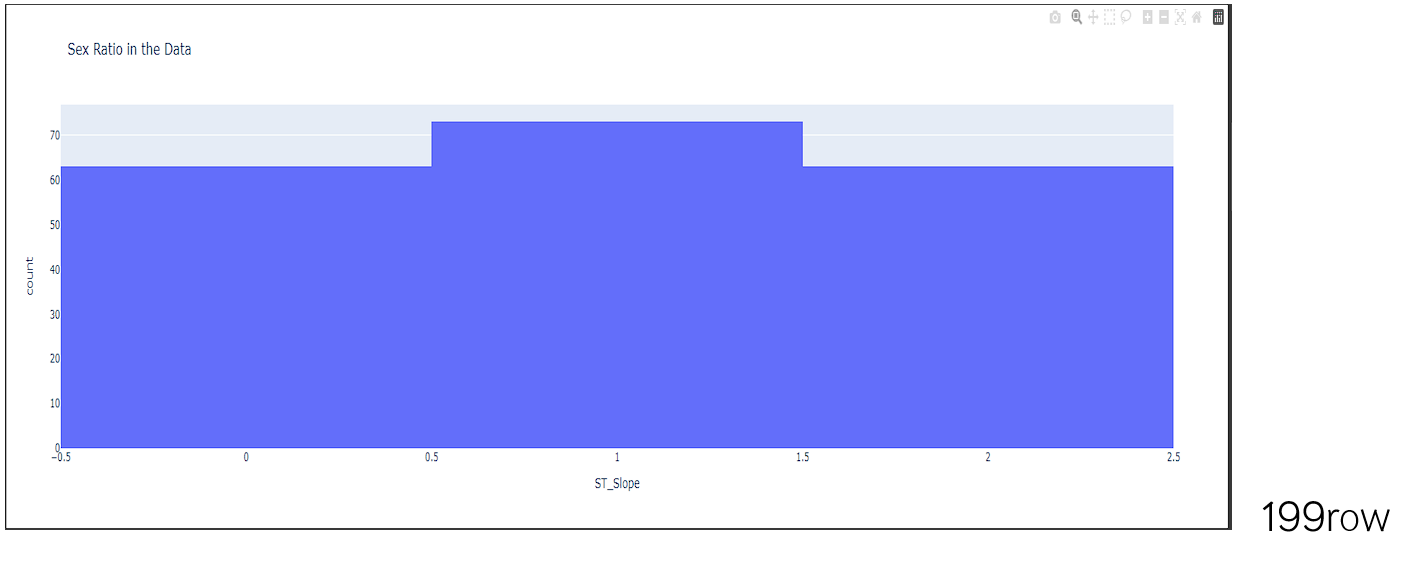

In [ ]:
X = df.drop('HeartDisease',axis=1)

In [ ]:
Y = df['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Model RandomForestClassifier
start_time = time.time()

model = RandomForestClassifier()

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
model.fit(X_train, y_train)

test_score = model.score(X_test, y_test)

print("Scores of each fold:")

for i, score in enumerate(cv_scores):
    print(f"Fold {i+1}: {score}")

cv_mean = cv_scores.mean()
print("Mean Cross-Validation Score:", cv_mean)

print("Test Set Score:", test_score)

end_time = time.time()
execution_time = end_time - start_time
print("Execution time: ", execution_time, " seconds")

In [ ]:
# Model Support Vector Machines
start_time = time.time()

model = SVC()

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
model.fit(X_train, y_train)

test_score = model.score(X_test, y_test)

print("Scores of each fold:")
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1}: {score}")

cv_mean = cv_scores.mean()
print("Mean Cross-Validation Score:", cv_mean)

print("Test Set Score:", test_score)

end_time = time.time()
execution_time = end_time - start_time
print("Execution time: ", execution_time, " seconds")

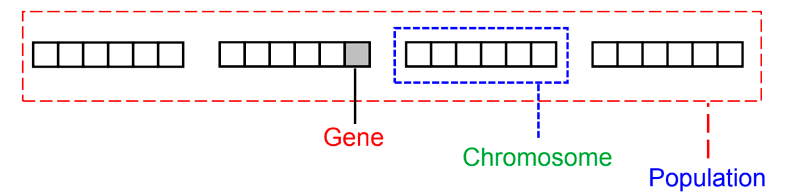

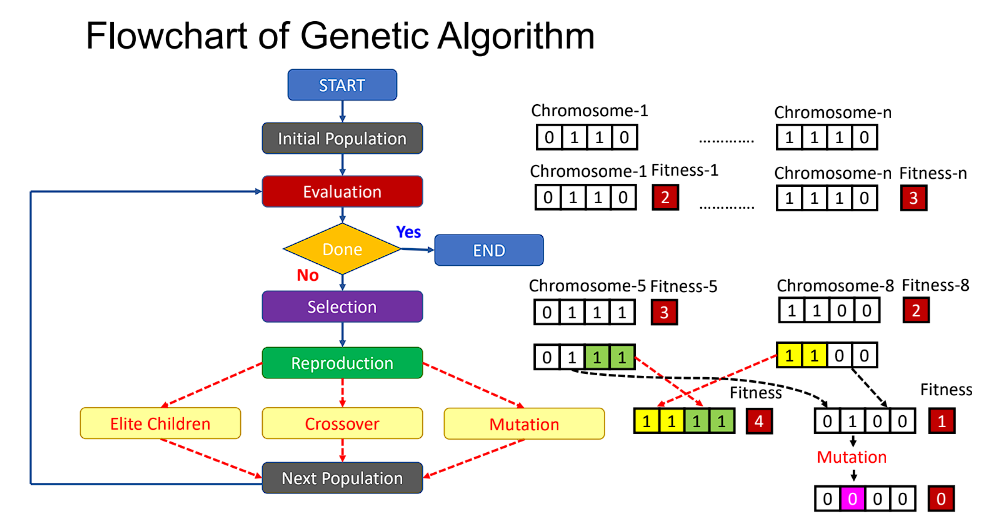

https://cppsecrets.com/users/826011211111910111497107971151045664103109971051084699111109/Genetic-Algorithm.php
https://www.tutorialspoint.com/genetic_algorithms/genetic_algorithms_parent_selection.htm

1 — การเริ่มต้น: สร้าง chromosome เริ่มต้นด้วย param_grid (Gene) ที่มีค่าพารามิเตอร์สุ่มอยู่ภายในขอบเขตที่กำหนดไว้.

2 — การประเมินเริ่มต้น: คำนวณค่า Fitness (accuracy).

3 — Selection: การเลือก Chromosome  ว่า Chromosome  ไหน ควรที่จะอยู่และ Chromosome  ไหนควรที่จะเอาออก โดยเราจะให้โอกาสกับ Chromosome  ที่มี fitness ที่ดีกว่า ผ่านเป็นรุ่นต่อไปมากกว่า Chromosome  ที่มี fitness ที่แย่กว่า

4— Mutation: การกลายพันธุ์ คือการเปลี่ยน Gene ของ Chromosome ที่เรามี

5 — Crossover: การสร้าง chromosome ใหม่ขึ้นโดยจะสุ่ม chromosome จาก population ของเรามา 2 ตัวและเลือกตำแหน่งที่เราจะทำการเปลี่ยน gene ซึ่งเราจะเรียกตัวแหน่งนั้นว่า Crossover point โดย Crossover point จะถูกกำหนดจากการสุ่มจุดขึ้นมา

6 — Termination: เงื่อนไขในการหยุด ทำงานของ Genetic Algorithm โดยการหยุดการทำงานของ Genetic Algorithm จะขึ้นอยู่ที่ จำนวน Generations

In [ ]:
# Use Genetic To Hyperparameter Tuning Model RandomForestClassifier

start_time = time.time()

clf = RandomForestClassifier()

param_grid = {'max_depth': Integer(2, 500),
              'max_leaf_nodes': Integer(2, 500),
              'n_estimators': Integer(100, 2000),
              'criterion' : Categorical(['gini', 'entropy'])}

evolved_estimator = GASearchCV(estimator=clf,
                               cv=5,
                               scoring='accuracy',
                               population_size=5,
                               generations=25,
                               mutation_probability=0.35,
                               crossover_probability=0.35,
                               param_grid=param_grid)

evolved_estimator.fit(X_train, y_train)
print(evolved_estimator.best_params_)

print("Stats achieved in each generation: ", evolved_estimator.history)
print("Best k solutions: ", evolved_estimator.hof)

test_score = evolved_estimator.score(X_test, y_test)
print("Test Score:", test_score)

end_time = time.time()
execution_time = end_time - start_time
print("Execution time: ", execution_time, " seconds")

In [ ]:
# Use Genetic To Hyperparameter Tuning Model Support Vector Machines

start_time = time.time()

clf = SVC()

param_grid = {'C': Continuous(0.01, 1.0),
              'kernel': Categorical(['linear', 'rbf', 'sigmoid']),
              'gamma': Continuous(0.001, 1.0)}

evolved_estimator = GASearchCV(estimator=clf,
                               cv=5,
                               scoring='accuracy',
                               population_size=5,
                               generations=25,
                               mutation_probability=0.35,
                               crossover_probability=0.35,
                               param_grid=param_grid)

evolved_estimator.fit(X_train, y_train)
print(evolved_estimator.best_params_)

print("Stats achieved in each generation: ", evolved_estimator.history)
print("Best k solutions: ", evolved_estimator.hof)

test_score = evolved_estimator.score(X_test, y_test)
print("Test Score:", test_score)

end_time = time.time()
execution_time = end_time - start_time
print("Execution time: ", execution_time, " seconds")

In [ ]:
# Use Grid Search To Hyperparameter Tuning Model RandomForestClassifier

start_time = time.time()

clf = RandomForestClassifier()

param_grid = {'max_depth': [50, 100, 200, 500],
              'max_leaf_nodes': [50, 100, 200, 500],
              'n_estimators': [100, 500, 1000, 1500, 2000],
              'criterion' : ['gini', 'entropy']}

grid_search = GridSearchCV(estimator=clf,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

test_score = grid_search.score(X_test, y_test)
print("Test Score:", test_score)

end_time = time.time()
execution_time = end_time - start_time
print("Execution time: ", execution_time, " seconds")

In [ ]:
# Use Grid Search To Hyperparameter Tuning Model Support Vector Machines

start_time = time.time()

clf = SVC()

param_grid = {'C': [0.01, 0.1, 1.0],
              'kernel': ['linear', 'rbf', 'sigmoid'],
              'gamma': [0.001, 0.01, 0.1,1.0]}

grid_search = GridSearchCV(estimator=clf,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5)

grid_search.fit(X_train, y_train)

print("\nBest parameters found:")
print(grid_search.best_params_)

test_score = grid_search.score(X_test, y_test)
print("Test Score:", test_score)

end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

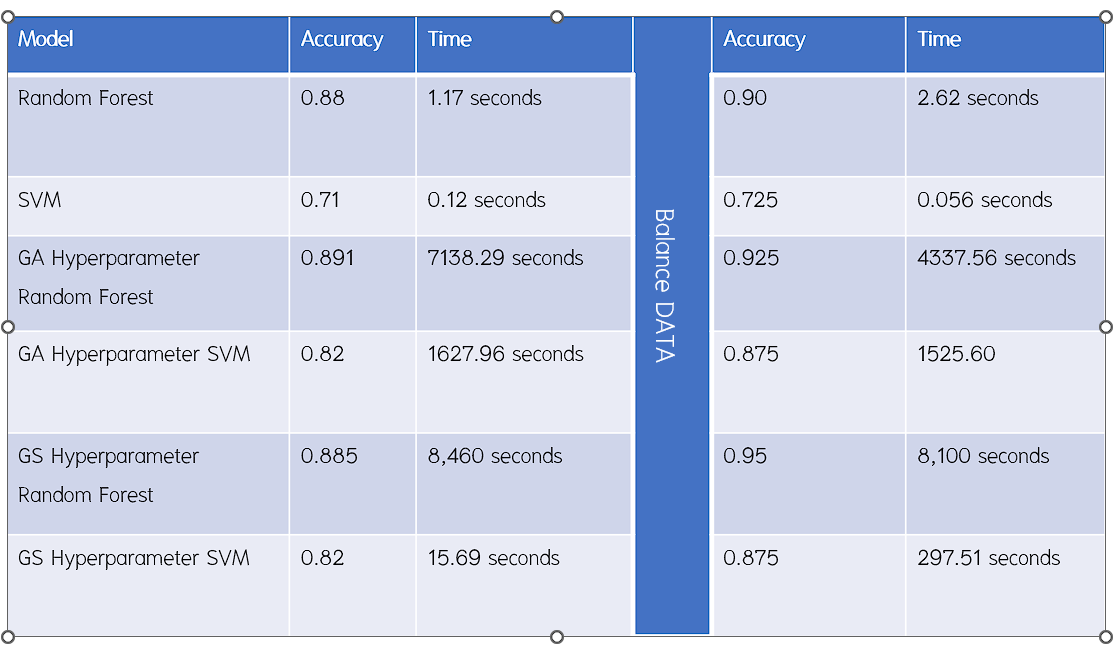